In [1]:
import cv2                                                    # For importing OpenCV

In [2]:
import matplotlib.pyplot as plt                               # For importing matplot library

In [3]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'  # This is the configuration file
frozen_model = 'frozen_inference_graph.pb'                    # This is the pre-trained TensorFlow model

In [4]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)      # For loading the model and configuration file into memory

In [5]:
classLabels = []                                              # Creating an empty List in python
file_name = 'labels.txt'                                      # Reading the contents of 'labels.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')         # Transferring the contents of 'labels.txt' to 'classLabels' list

In [6]:
model.setInputSize(320,320)                                   # Input size is 320x320 as defined in the configuration file
model.setInputScale(1.0/127.5)                                # Scaling the Grey level (0-255) of image i.e. 255/2=127.5 
model.setInputMean((127.5,127.5,127.5))                       # Taking mean of 127.5 as input domain of MobileNet is [-1,1]
model.setInputSwapRB(True)                                    # Automatically converts image from BGR to RGB color space

< cv2.dnn.Model 000002477A565290>

In [7]:
img = cv2.imread('original_sample_image.jpg')                          # Reading a sample image

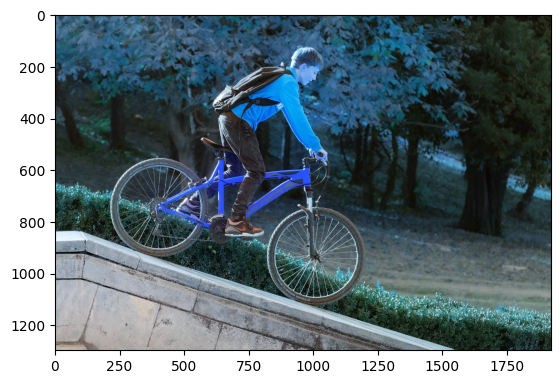

In [8]:
plt.imshow(img)                                               # OpenCV reads and outputs an image in BGR color space by default

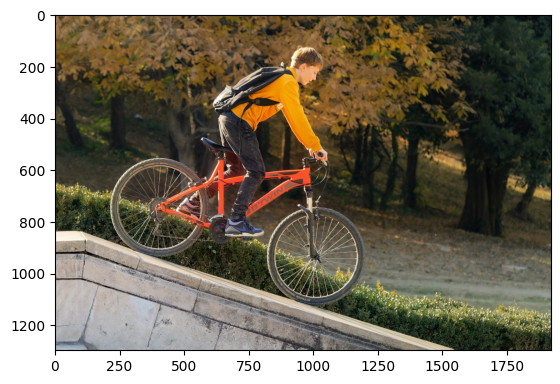

In [9]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))               # Image is converted from BGR to RGB color space

In [10]:
ClassIndex, confidence, bbox = model.detect(img,confThreshold=0.5)   # 3 outputs based on Threshold accuracy which is 0.5 (50%) 

In [11]:
font_scale = 10                        # Setting font size 
font = cv2.FONT_HERSHEY_PLAIN          # Setting font type
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)      # Rectangle color will be 'blue' according to BGR color space, font scale is 2 
    label = f"{classLabels[ClassInd - 1]}: {conf:.2f}"
    
    (text_width, text_height), _ = cv2.getTextSize(label, font, font_scale, 15)  # Get text size to avoid cutting off text
   
    x, y = boxes[0] + 10, boxes[1] + 40  # Adjust text position to make sure it's inside the image

    # Check if the text goes beyond the image boundaries
    if x + text_width > img.shape[1]:
        x = img.shape[1] - text_width - 10  # Adjust x if text overflows on the right
    if y + text_height > img.shape[0]:
        y = img.shape[0] - text_height - 10  # Adjust y if text overflows at the bottom

    # Display the label with adjusted position
    cv2.putText(img, label, (x, y), font, fontScale=font_scale, color=(0, 255, 0), thickness=15)

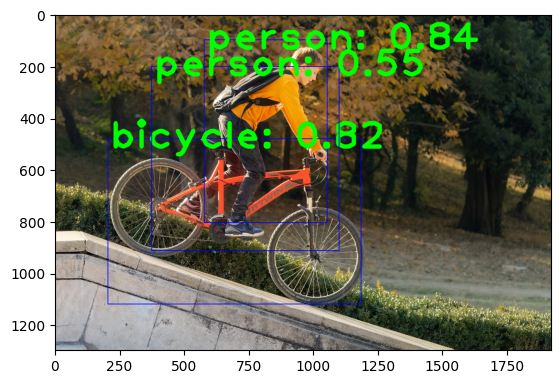

In [12]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))             # person and bicycle in the picture are identified